**Exploratory Data Analysis and Data Preprocessing**

In [1]:
#impoting required libraries
!pip install keras
!pip install IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image,display
from sklearn.preprocessing import RobustScaler

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.5 MB/s eta 0:00:00


In [2]:
data17=pd.read_excel('PriceData_2017.xlsx')
data18=pd.read_excel('PriceData_2018.xlsx')
data19=pd.read_excel('PriceData_2019.xlsx')
data20=pd.read_excel('PriceData_2020.xlsx')
data21=pd.read_excel('PriceData_2021.xlsx')
data22=pd.read_excel('PriceData_2022.xlsx')

In [3]:
frames=[data17,data18,data19,data20,data21,data22]
data = pd.concat(frames)
data=data.iloc[:,1:3]
data.columns = ['Date', 'Price'] # Set column names
data

,Date,Price
0,02-01-2017,"₹ 2,517.70"
1,03-01-2017,"₹ 2,543.94"
2,04-01-2017,"₹ 2,539.23"
3,05-01-2017,"₹ 2,570.11"
4,06-01-2017,"₹ 2,569.91"
...,...,...
255,26-12-2022,"₹ 4,802.81"
256,27-12-2022,"₹ 4,817.06"
257,28-12-2022,"₹ 4,798.47"
258,29-12-2022,"₹ 4,806.80"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1562 non-null   object
 1   Price   1562 non-null   object
dtypes: object(2)
memory usage: 36.6+ KB


In [6]:
# remove the rupees sign from the 'Price' column
data['Price'] = data['Price'].str.replace('₹', '')

In [7]:
# remove the comma from the 'Price' column
data['Price'] = data['Price'].str.replace(',', '')
# convert the 'Price' column to a numeric data type
data['Price'] = pd.to_numeric(data['Price'])

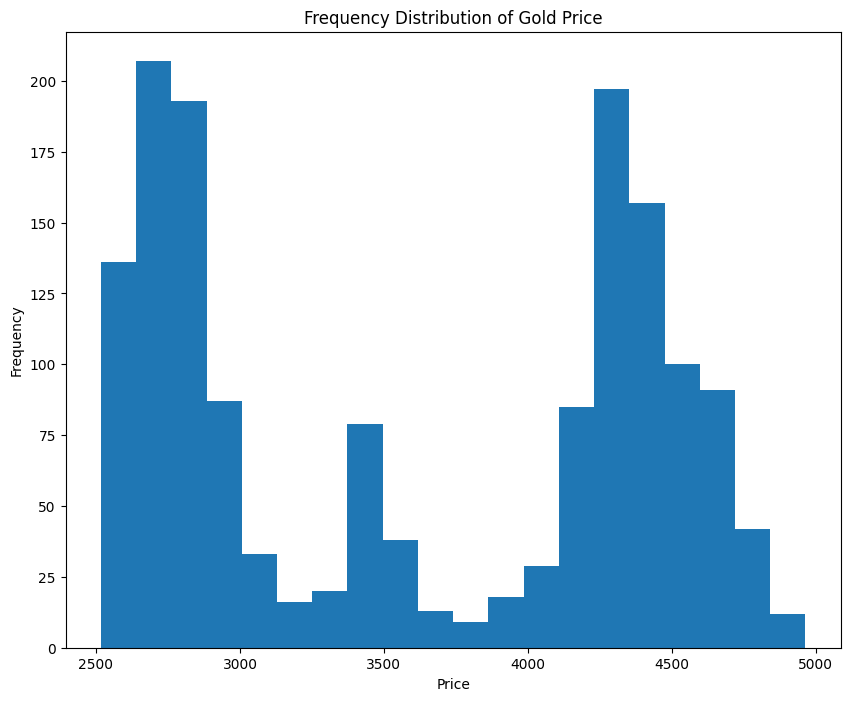

In [8]:
#Histogram
plt.hist(data['Price'], bins=20)
plt.title('Frequency Distribution of Gold Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

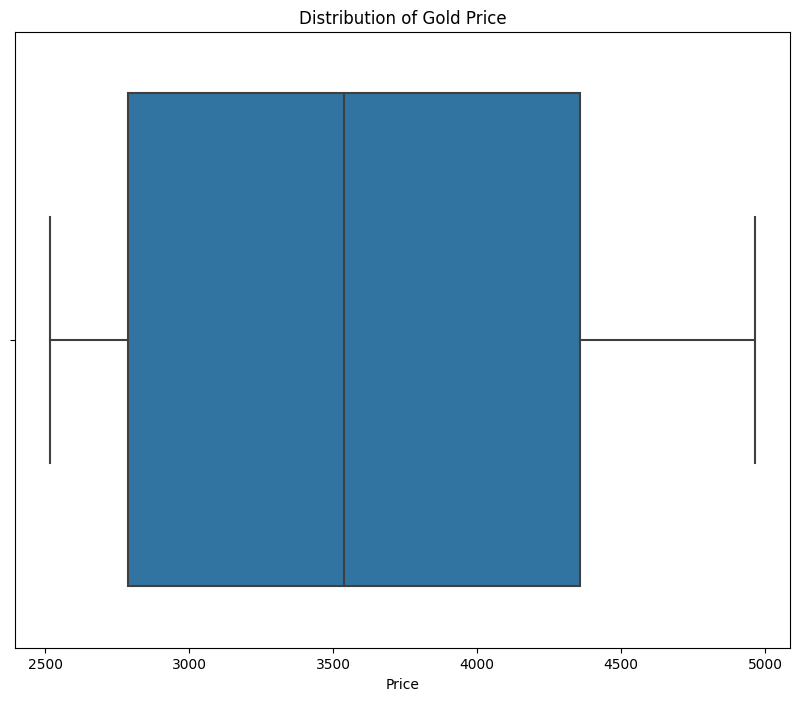

In [9]:
#Boxplot
import seaborn as sns
sns.boxplot(x=data['Price'])
plt.title('Distribution of Gold Price')
plt.show()

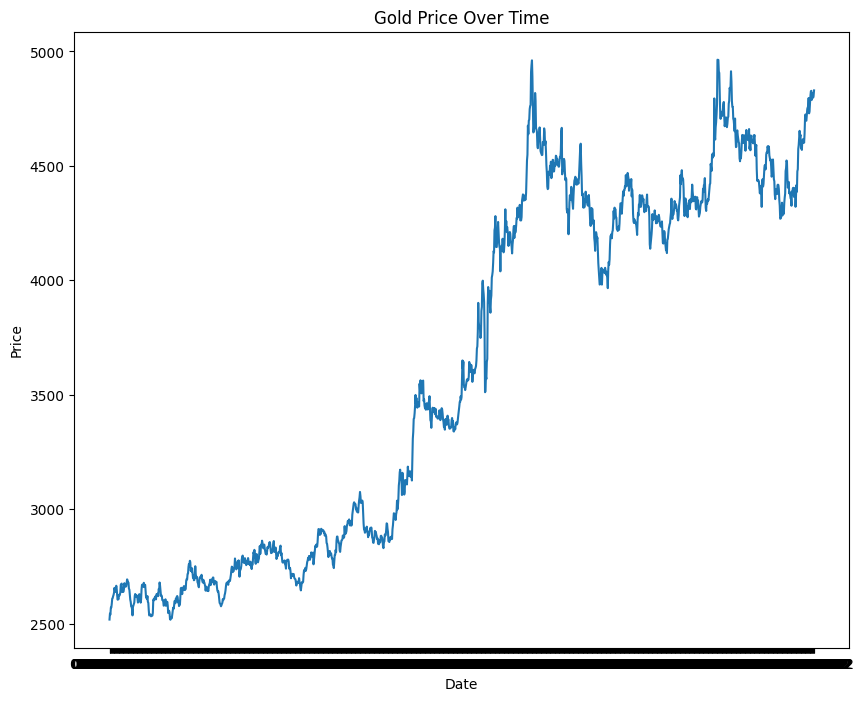

In [10]:
#Time series plot
plt.plot(data['Date'], data['Price'])
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [11]:
# Convert dates to datetime format
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-11-f0847bb6cf11>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


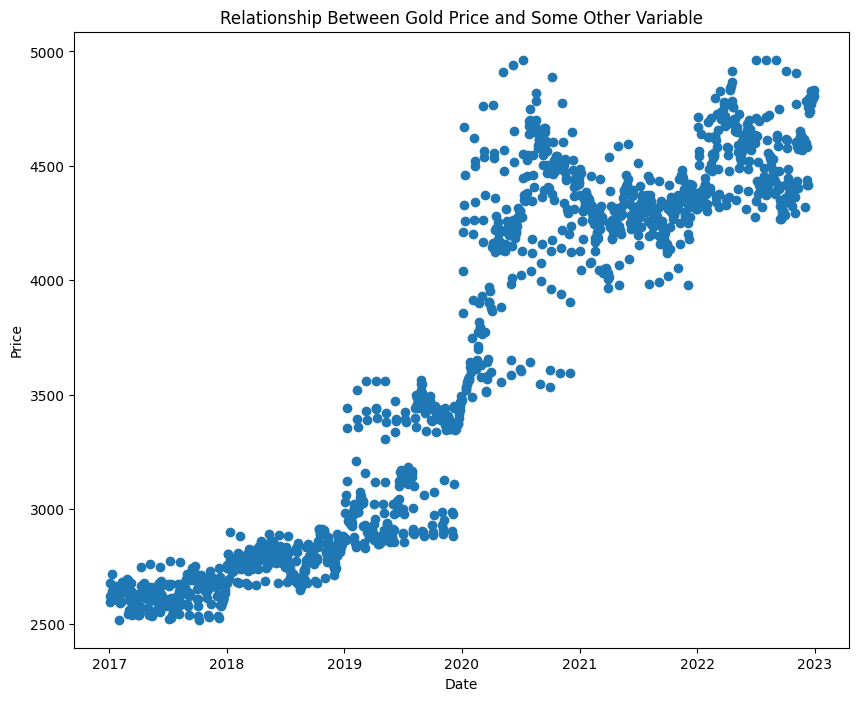

In [12]:
#Scatter plot
plt.scatter(data['Date'], data['Price'])
plt.title('Relationship Between Gold Price and Some Other Variable')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

**Predictive Model Building using RNN**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Scale the training data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_data = scaler.fit_transform(train_data['Price'].values.reshape(-1,1))


# Create sequences of inputs and targets
X_train, y_train = [], []
n_steps = 30
for i in range(n_steps, len(scaled_train_data)):
    X_train.append(scaled_train_data[i-n_steps:i, 0])
    y_train.append(scaled_train_data[i, 0])

# Convert the sequences to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data for the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [15]:
# Scale the testing data
scaler = MinMaxScaler(feature_range=(0,1))
# Scale the testing data
scaled_test_data = scaler.fit_transform(test_data['Price'].values.reshape(-1,1))

# Create sequences of inputs and targets for test data
X_test, y_test = [], []
for i in range(n_steps, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-n_steps:i, 0])
    y_test.append(scaled_test_data[i, 0])

# Convert the sequences to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data for the LSTM model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [17]:
# Define the model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [19]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 8s 58ms/step - loss: 0.0136
Epoch 2/100
39/39 [==============================] - 2s 64ms/step - loss: 0.0016
Epoch 3/100
39/39 [==============================] - 2s 44ms/step - loss: 0.0013
Epoch 4/100
39/39 [==============================] - 2s 45ms/step - loss: 0.0013
Epoch 5/100
39/39 [==============================] - 2s 45ms/step - loss: 0.0012
Epoch 6/100
39/39 [==============================] - 2s 44ms/step - loss: 0.0012
Epoch 7/100
39/39 [==============================] - 2s 45ms/step - loss: 0.0013
Epoch 8/100
39/39 [==============================] - 3s 71ms/step - loss: 0.0011
Epoch 9/100
39/39 [==============================] - 3s 66ms/step - loss: 0.0012
Epoch 10/100
39/39 [==============================] - 2s 44ms/step - loss: 0.0010
Epoch 11/100
39/39 [==============================] - 2s 44ms/step - loss: 0.0010
Epoch 12/100
39/39 [==============================] - 2s 45ms/step - loss: 9.8041e-04
Epoch 13/100
39/39 [=

In [ ]:
# Evaluate the model on the test data
mse= model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)


9/9 [==============================] - 0s 18ms/step - loss: 0.0036
Mean Squared Error: 0.003561353078112006


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

9/9 [==============================] - 1s 16ms/step


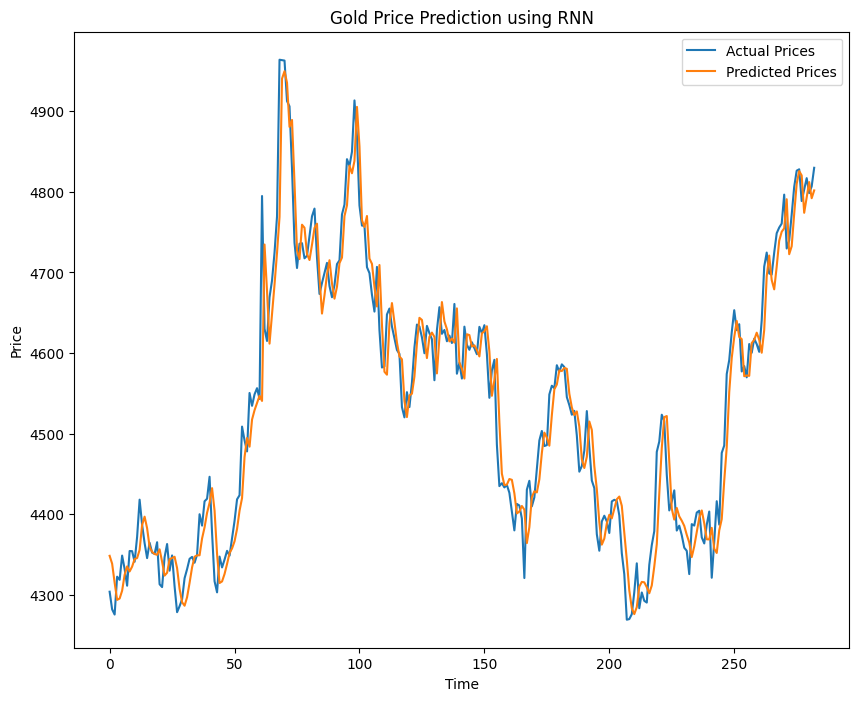

In [ ]:
# Inverse transform the scaled values to get the actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

# Plot the predicted values and actual values
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Gold Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Coefficient of Determination (R^2)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination:", r2)


Mean Absolute Error: 31.428996107553
Root Mean Squared Error: 41.8992698953278
Coefficient of Determination: 0.9373646741435862
